In [1]:
import geoplanar
import geopandas

/Users/noraizasif/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
j = geopandas.read_file("fullDownload.geojson")

In [4]:
j.head()

,state,city,name,holc_id,holc_grade,area_description_data,geometry
0,AL,Birmingham,Mountain Brook Estates and Country Club Garden...,A1,A,{'5': 'Both sales and rental prices in 1929 we...,"MULTIPOLYGON (((-86.75678 33.49754, -86.75692 ..."
1,AL,Birmingham,"Redmont Park, Rockridge Park, Warwick Manor, a...",A2,A,{'5': 'Both sales and rental prices in 1929 we...,"MULTIPOLYGON (((-86.75867 33.50933, -86.76093 ..."
2,AL,Birmingham,"Colonial Hills, Pine Crest (outside city limits)",A3,A,"{'5': 'Generally speaking, houses are not buil...","MULTIPOLYGON (((-86.75678 33.49754, -86.75196 ..."
3,AL,Birmingham,"Grove Park, Hollywood, Mayfair, and Edgewood s...",B1,B,{'5': 'Both sales and rental prices in 1929 we...,"MULTIPOLYGON (((-86.80111 33.48071, -86.80099 ..."
4,AL,Birmingham,Best section of Woodlawn Highlands,B10,B,{'5': 'Both sales and rental prices in 1929 we...,"MULTIPOLYGON (((-86.74923 33.53332, -86.74916 ..."


In [5]:
j.shape

(7502, 7)

In [6]:
len(j.city.unique())

148

In [7]:
j.groupby(by='holc_grade').count()

,state,city,name,holc_id,area_description_data,geometry
holc_grade,,,,,,
A,819,819,233,813,819,819
B,1950,1950,443,1935,1950,1950
C,2960,2960,544,2943,2960,2960
D,1771,1771,296,1750,1771,1771
E,2,2,0,2,2,2


In [8]:
# subset data for California
ca = j[j.state=='CA']

In [9]:
ca.head()

,state,city,name,holc_id,holc_grade,area_description_data,geometry
114,CA,Fresno,None,A1,A,{'1': 'This is the best residential district i...,"MULTIPOLYGON (((-119.80871 36.77829, -119.8026..."
115,CA,Fresno,None,A2,A,{'1': 'This small area stands out definitely f...,"MULTIPOLYGON (((-119.80451 36.76402, -119.8011..."
116,CA,Fresno,None,B1,B,{'1': 'This is an area comprised entirely of n...,"MULTIPOLYGON (((-119.80355 36.78662, -119.8016..."
117,CA,Fresno,None,B2,B,{'1': 'This area is a very good residential di...,"MULTIPOLYGON (((-119.80111 36.77551, -119.8010..."
118,CA,Fresno,None,B3,B,{'1': 'This area is a comparatively new sub-di...,"MULTIPOLYGON (((-119.74693 36.74631, -119.7423..."


In [10]:
ca.city.unique()

array(['Fresno', 'Los Angeles', 'Oakland', 'Sacramento', 'San Diego',
       'San Francisco', 'San Jose', 'Stockton'], dtype=object)

Subsetting for Oakland to study any potential cartographic issues in the digitalized HOLC maps from 1930.

In [27]:
oak = j[j.city=='Oakland']

In [28]:
oak.head()

,state,city,name,holc_id,holc_grade,area_description_data,geometry
554,CA,Oakland,None,A,A,{'': ''},"MULTIPOLYGON (((-122.20252 37.81099, -122.2023..."
555,CA,Oakland,None,A1,A,"{'1': 'A-1 Green Berkeley', '2': 'Characterize...","MULTIPOLYGON (((-122.26319 37.90040, -122.2618..."
556,CA,Oakland,None,A10,A,"{'1': 'Low Green A-10 Oakland', '2': 'Rolling'...","MULTIPOLYGON (((-122.23403 37.80671, -122.2343..."
557,CA,Oakland,None,A11,A,"{'1': 'Oakland, California Green A-11', '2': '...","MULTIPOLYGON (((-122.20252 37.81099, -122.2033..."
558,CA,Oakland,None,A2,A,"{'1': 'Berkeley A-2 Green', '2': 'Hilly, with ...","MULTIPOLYGON (((-122.27847 37.89710, -122.2785..."


In [13]:
oak.shape

(119, 7)

In [14]:
oak.groupby(by='holc_grade').count()

,state,city,name,holc_id,area_description_data,geometry
holc_grade,,,,,,
A,12,12,0,12,12,12
B,46,46,0,46,46,46
C,41,41,0,41,41,41
D,20,20,0,20,20,20


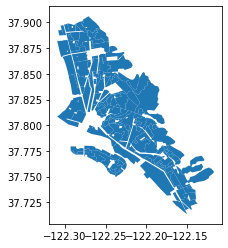

In [15]:
oak.plot()

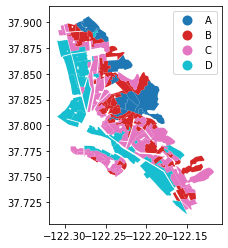

In [16]:
oak.plot(column='holc_grade', categorical=True, legend=True)

In [17]:
import contextily as ctx

In [18]:
oak = oak.to_crs(epsg=3857)

In [19]:
%time img, ext = ctx.bounds2img(*oak.total_bounds,12)

CPU times: user 293 ms, sys: 51.9 ms, total: 345 ms
Wall time: 2.58 s


In [20]:
ext

(-13619243.951739563,
 -13589892.132878058,
 4529964.044292685,
 4569099.802774696)

In [21]:
import matplotlib.pyplot as plt

In [22]:
from matplotlib.colors import ListedColormap

In [23]:
ctx.providers.keys()

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG'])

In [24]:
ctx.providers.Stamen.TonerLite

{'url': 'https://stamen-tiles-{s}.a.ssl.fastly.net/{variant}/{z}/{x}/{y}{r}.{ext}',
 'attribution': 'Map tiles by Stamen Design, CC BY 3.0 -- Map data (C) OpenStreetMap contributors',
 'subdomains': 'abcd',
 'min_zoom': 0,
 'max_zoom': 20,
 'variant': 'toner-lite',
 'ext': 'png',
 'name': 'Stamen.TonerLite'}

In [25]:
code_colors = ['darkgreen', 'steelblue', 'yellow', 'firebrick']

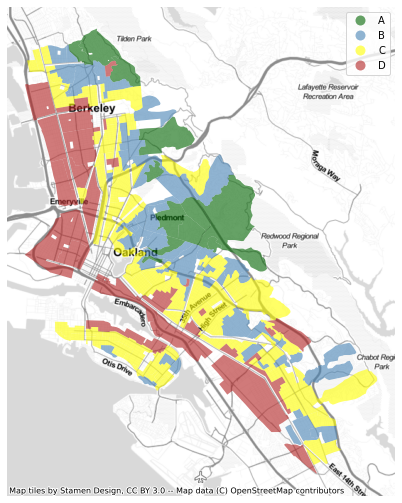

In [26]:
f, ax = plt.subplots(1, figsize=(9, 9))
# Display tile map
#ax.imshow(img, extent=ext)
# Display airports on top
#ax.scatter(air.x, air.y, c='purple', s=2)
# Remove axis
oak.plot(ax=ax, column='holc_grade', categorical=True, legend=True, alpha=.6,
            cmap=ListedColormap(code_colors))
ctx.add_basemap(ax, crs=oak.crs.to_string(),
               source = ctx.providers.Stamen.TonerLite)
ax.set_axis_off()
# Add title
plt.show()

## Finding the Holes 

In [29]:
oak_holes = geoplanar.holes(oak)
oak_holes.total_bounds

array([-122.297869,   37.726486, -122.145402,   37.897102])

In [30]:
oak_holes.shape

(27, 3)

There are 27 holes in the Oakland HOLC map.

#### Omitted Interior Violation: 

- For a planar enforced polygon layer there should be no individual polygons that are contained inside other polygons.
- Violation of this condition can lead to a number of errors in subsequent spatial analysis.


### Subset for Grade D

In [36]:
oak.groupby(by='holc_grade').count()
# There are 20 areas that are marked as D.

,state,city,name,holc_id,area_description_data,geometry
holc_grade,,,,,,
A,12,12,0,12,12,12
B,46,46,0,46,46,46
C,41,41,0,41,41,41
D,20,20,0,20,20,20


In [37]:
oak_D = oak[oak.holc_grade=='D']

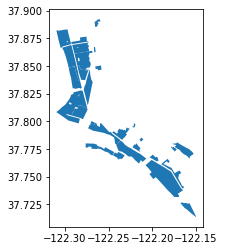

In [38]:
oak_D.plot()


In [39]:
oak_D_holes = geoplanar.holes(oak_D)
oak_D_holes.shape

(7, 3)

In [40]:
oak_D_holes.total_bounds

array([-122.297869,   37.797052, -122.265254,   37.872644])

In [35]:
oak_D.area

<ipython-input-35-dbc6cf63979f>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  oak_D.area


653    0.000023
654    0.000095
655    0.000183
656    0.000006
657    0.000008
658    0.000032
659    0.000242
660    0.000122
661    0.000012
662    0.000682
663    0.000076
664    0.000197
665    0.000155
666    0.000366
667    0.000232
668    0.000022
669    0.000163
670    0.000266
671    0.000444
672    0.000137
dtype: float64

In [41]:
oak_D = oak_D.to_crs(epsg=3857)

In [42]:
oak_D_new = geoplanar.fill_holes(oak_D)

/Users/noraizasif/Documents/GitHub/geoplanar/geoplanar/hole.py:115: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: None

  neighbors = geopandas.sjoin(left_df=gdf, right_df=rdf, how='inner',
/Users/noraizasif/Documents/GitHub/geoplanar/geoplanar/hole.py:115: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: None

  neighbors = geopandas.sjoin(left_df=gdf, right_df=rdf, how='inner',
/Users/noraizasif/Documents/GitHub/geoplanar/geoplanar/hole.py:115: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: None
